In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import json, requests

In [2]:
base = 'https://aicomputervisionstudy.cognitiveservices.azure.com/vision/v2.1/analyze'
key = '563c0b0845fd40008fafe5f1381b779e'

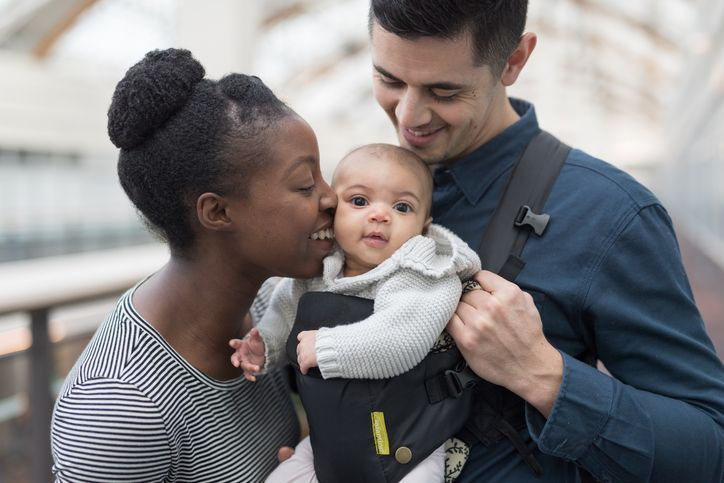

In [3]:
image_url = 'https://w.namu.la/s/5d5ec65c290284aa95363cc3b26b78dfb14d30739dd299c6728c016421eed661245d23776d22eb478b2bca6445c862bf74262298d4240ec3d5c6c27cb0ae3d47e58c0f61e2578f154acef752d5abfe62358659674438039be10fad1d48c6513a'
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [4]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [5]:
response = requests.post(base, headers=headers, params=params, json=data).json()
response

{'categories': [{'name': 'people_young',
   'score': 0.71484375,
   'detail': {'celebrities': []}}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White', 'Black', 'Grey'],
  'accentColor': '384B60',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['person',
   'outdoor',
   'holding',
   'small',
   'child',
   'boy',
   'little',
   'woman',
   'standing',
   'young',
   'baby',
   'sitting',
   'stuffed',
   'man',
   'table',
   'wearing',
   'bear',
   'hat',
   'people',
   'shirt'],
  'captions': [{'text': 'a person holding a baby',
    'confidence': 0.8623688486562467}]},
 'requestId': '24d1f334-5983-4e93-ac8b-7d646b9a764a',
 'metadata': {'height': 483, 'width': 724, 'format': 'Jpeg'}}

In [6]:
response['description']['captions'][0]['text'].capitalize()

'A person holding a baby'